In [6]:
import numpy as np
import pandas as pd
import plotly as py
import plotly.graph_objs as go
import ipywidgets as widgets
from scipy import special
import matplotlib.pyplot as plt
%matplotlib inline

py.tools.set_credentials_file(username='toboa', api_key='ZdyIfyp9N9aHvcmAxnca')

py.offline.init_notebook_mode(connected=True) 

In [9]:
#imports the fungi_data
fungi_data = pd.read_csv("march_6_fungi_data.csv",  delimiter = "\t")

fungi_data.to_excel('fungi_data_3_14.xlsx')


## NOTE: Drops the columns of data that are not useful to us.
fungi_clean = fungi_data.drop(['datasetKey', 'kingdom', 'phylum', 'order','class', 'taxonRank', 
                               'infraspecificEpithet', 'species','rightsHolder', 'license', 'mediaType', 
                               'issue','institutionCode', 'collectionCode','catalogNumber', 'recordNumber',
                               'identifiedBy', 'dateIdentified', 'typeStatus', 'establishmentMeans', 'lastInterpreted',
                               'basisOfRecord',  'elevationAccuracy', 'depth', 'depthAccuracy', 'coordinatePrecision',
                               'elevation', 'countryCode', 'locality', 'eventDate', 'taxonKey','speciesKey', 'recordedBy',
                               'publishingOrgKey', 'gbifID', 'occurrenceID', 'day'], 
                              axis = 1)



/Users/louis/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning:

Columns (10,33,36,40,43) have mixed types. Specify dtype option on import or set low_memory=False.



## Exploring the data
making graphs of mushroom occurence in each month.

<function matplotlib.pyplot.show(*args, **kw)>

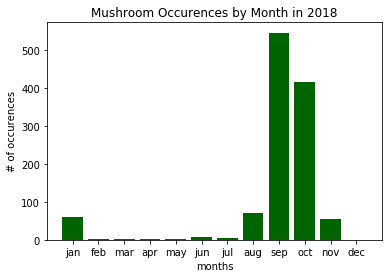

In [10]:
fungi_clean = fungi_clean.sort_values('year')
year_num = 2018
# # the years with the most data are 1988 and 1993, with 233 and 244 data points reespectively
data_year = fungi_clean.loc[fungi_clean['year'] == year_num, 'month']
# print("This is summary of data from", year_num, ":\n", data_year.describe())

def DataCall(year_num, month):
    data_year = fungi_clean.loc[fungi_clean['year'] == year_num, 'month']
    return data_year

months = []
month_names = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']


dataset = data_year
for i in range(12): 
    temporary_data = (data_year == i+1).sum()
    months = np.append(months, temporary_data)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set(title = "Mushroom Occurences by Month in 2018", 
       ylabel = "# of occurences",
       xlabel = "months")
ax.bar(month_names, months, width = .8, color= 'darkgreen')
plt.savefig("mushroom_occurence_2018.png", dpi=300)
plt.show

## Plotly!
#### Our Attempt

We used plotly at first to graph sliders like the one shown below. However, as we wanted to be practical to the limitations of our report we decided to switch to other libraries.

In [17]:
#imports plotly specfic libraries
import plotly.plotly as py
from plotly.grid_objs import Grid, Column
from plotly.tools import FigureFactory as FF 

import pandas as pd
import time


In [18]:
# normalizes the data from the year (input) and outputs what percent of observation occured in each of the months
def DataCall(year_num):
    month_sum = np.zeros(13)
    
    data_year = fungi_clean.loc[fungi_clean['year'] == year_num, 'month']
    
    for i in range(1,13):
        month_sum[i-1] = sum(data_year == i)
        total_sum = sum(month_sum)
    normalized_data = (month_sum / total_sum *100)
    return normalized_data, total_sum


In [19]:
#The plotly graph with slider

#this is axis and titles
layout = go.Layout(
    title='Mushroom occurance throughout the years',
    yaxis=dict(
        range=[0, 100]        
    )
)  
    
#### this is the function that is called to write the plot
def update_plot(years2):
    """
    This function updates the plot everytime a widget is changed
    """

    month_sum, total = DataCall(years2)
    trace1 = go.Bar(
        x=['January', 'Febuary', 'March', 'April', 'May', 'June', 'July', 'August', 'October', 'November','December'],
        y=[ month_sum[1],month_sum[2],month_sum[3],month_sum[4],month_sum[5],month_sum[6],
          month_sum[7],month_sum[8],month_sum[9],month_sum[10],month_sum[11],month_sum[12]],
        marker=dict(
            color='rgb(158,202,225)',
            line=dict(
                color='rgb(8,48,107)',
                width=1.5,
            )
        ),
        opacity=0.6
    )
    data = [trace1]
    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig)
    
years_slide = widgets.IntSlider(min=1950, max=2018, value=1, description='years')
widgets.interactive(update_plot, years2=years_slide)



interactive(children=(IntSlider(value=1950, description='years', max=2018, min=1950), Output()), _dom_classes=…

In [20]:
import plotly.plotly as py
import plotly.graph_objs as go

# Create random data with numpy
import numpy as np


years = np.arange(1950,2019,1)
totaler = []
for i in years:
    _, total = DataCall(i)
    totaler = np.append(totaler, total)

trace = go.Scatter(
    x = years,
    y = totaler,
    mode = 'markers')
data = [trace]

# Plot and embed in ipython notebook!
py.iplot(data, filename='basic-scatter')

# or plot with: plot_url = py.plot(data, filename='basic-line')

## Exponential Regression, non-linear LMS 

It's actually a lot of work https://towardsdatascience.com/machine-learning-with-python-easy-and-robust-method-to-fit-nonlinear-data-19e8a1ddbd49, so i just did the best fit I could for now using np

In [21]:

# checking for 0's
# print(totaler)
# print(years)

# a 0 exists at indices 10, and 18
totaler = np.delete(totaler, 9)
totaler = np.delete(totaler, 18)

years = np.delete(years, 9)
years = np.delete(years, 18)

In [22]:
#necessary for calculating r squared
from sklearn.metrics import r2_score

# NP has a built in model fitter, can get exponential by this method apparently
model = np.polyfit(years, np.log(totaler), 1, w=np.sqrt(totaler))

# y ≈ exp(b) * exp(a * x) 
predicted_data = np.exp(model[1]) * np.exp(model[0] * years)

r_squared =  r2_score(totaler, predicted_data)
    

Our R-squared value is: 0.7356743726771784


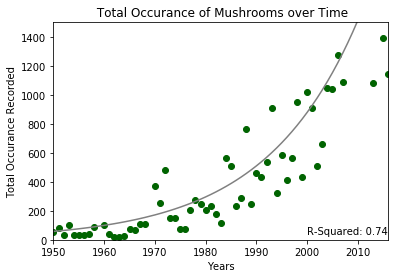

In [41]:
# Plotting it, obtaining r-squared values

print("Our R-squared value is:", r_squared)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set(xlim = [1950,2016],
       ylim = [0, 1500],
       xticks = np.arange(1950, 2016,10),
       title = " Total Occurance of Mushrooms over Time",
       xlabel = "Years",
       ylabel = "Total Occurance Recorded")
ax.scatter(years, totaler, color ='darkgreen')
ax.text(2000, 41.1, "R-Squared: 0.74")
ax.plot(years, 
        predicted_data, 
        color = 'grey')

plt.show
fig.savefig('Occurance.png', dpi= 300)

## Quadratic Regression (Old, false)

methods adapted from https://towardsdatascience.com/polynomial-regression-bbe8b9d97491

An exponential model would be more accurate, so, We are doing that instead

### Packages Required

In [25]:
# using PolynomialFeatures, Linear Regression, and r2 from
# scikit.
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

### Functions 

In [26]:
# Randomizes data
def data_shuffler(X, y):
    n = X.shape[0]
    order = np.random.permutation(n) 
    X = X[order]
    y = y[order]
    
    return X, y

In [27]:
# Tests the data 100 times and returns most accurate model.
def quadratic_cross_val(results, years, test_frac, poly_degree, reps):
    highest_r2 = 0
    related_rmse = 0 
    related_x_poly = []
    best_y_poly_pred = 0
    trainfrac = int(years.shape[0]*(1-test_frac))
    
    for i in range(reps):
                     
        X, y = data_shuffler(years, results)
        train = X[0:trainfrac]
        test = X[trainfrac:]
        y_train = y[0:trainfrac]
        y_test= y[trainfrac:]
       
        
        X_train = train[:,np.newaxis]
        y_train = y_train[:,np.newaxis]

        features = PolynomialFeatures(degree = poly_degree)
        x_poly = features.fit_transform(X_train)
        
        model = LinearRegression()
        model.fit(x_poly, y_train)
        current_y_poly_pred = model.predict(x_poly)
        
        rmse = np.sqrt(mean_squared_error(y_train,current_y_poly_pred))
        r2 = r2_score(y_train,current_y_poly_pred)
        
        
        if i == 0:
            highest_r2 = r2
            related_rmse = rmse
            best_y_poly_pred = current_y_poly_pred
        
        if r2 > highest_r2:
            highest_r2 = r2
            related_rmse = rmse
            related_x_poly = X_train
            best_y_poly_pred = current_y_poly_pred
            storage = pd.DataFrame(related_x_poly, columns = ['years'])
            storage['predicted results'] = best_y_poly_pred
            storage = storage.sort_values(by=['years'])
        
    return r2, rmse, storage
        

In [29]:
# Graphs the results, need to add labels
def regression_plotter(dim1, dim2, xlim1, xlim2, X, y, x_poly, y_pred):
    fig = plt.figure(figsize = (dim1, dim2))
    ax = fig.add_subplot(111)
    ax.set(xlim = [xlim1,xlim2])
    ax.scatter(X,y)

    ax.plot(x_poly, 
            y_pred, 
            color = 'red')

    plt.show()

## First Draft

Our R-squared value is: 0.7879418602179836
Our Root-mean Squared Error is: 279.6255015065606


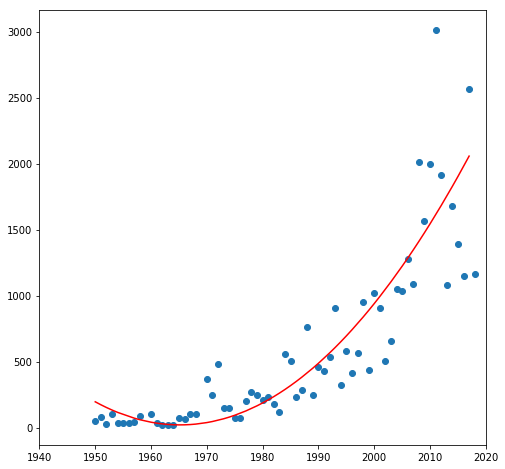

In [32]:
r2, rmse, storage = quadratic_cross_val(totaler, years, .2, 2, 10000)

print("Our R-squared value is:", r2)
print("Our Root-mean Squared Error is:", rmse)

regression_plotter(8,8, 1940, 2020, years, totaler, 
                   storage.iloc[:,0], storage.iloc[:,1] )

### Prior Work 

This is incorrect because I made a model using the whole dataset, so I did this and then I wrote a script to do the training on a set of the data, and then a script to output the results to a graph

In [31]:
pd_totaler = pd.DataFrame(totaler)
pd_years = pd.DataFrame(years)

pd_totaler['years'] =  pd_years

X = pd_totaler.iloc[:,1].values
y = pd_totaler.iloc[:,0].values

In [ ]:
# #transforming data to have another axis

X = X[:, np.newaxis]
y = y[:, np.newaxis]

In [ ]:
quadratic_features = PolynomialFeatures(degree = 2)
x_quad = quadratic_features.fit_transform(X)

In [ ]:
model = LinearRegression()
model.fit(x_quad, y)

y_quad_pred = model.predict(x_quad)

rmse = np.sqrt(mean_squared_error(y,y_quad_pred))
r2 = r2_score(y,y_quad_pred)
print(rmse)
print(r2)

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111)
ax.set(xlim = [1940,2020])
ax.scatter(X,y)

ax.plot(X, 
        y_quad_pred, 
        color = 'red')

plt.show

# Phong OG code 
#### (good shit!)

In [ ]:
#imports the fungi_data
fungi_data = pd.read_csv("march6_mushroom.csv",  delimiter = "\t")

## NOTE: Drops the columns of data that are not useful to us.
#left in  
fungi_clean = fungi_data.drop(['datasetKey', 'kingdom', 'phylum', 'family','order','class', 'taxonRank', 
                               'infraspecificEpithet', 'species','rightsHolder', 'license', 'mediaType', 
                               'issue','institutionCode', 'collectionCode','catalogNumber', 'recordNumber',
                               'identifiedBy', 'dateIdentified', 'typeStatus', 'establishmentMeans', 'lastInterpreted',
                               'basisOfRecord',  'elevationAccuracy', 'depth', 'depthAccuracy', 'coordinatePrecision',
                               'elevation', 'countryCode', 'locality', 'eventDate', 'taxonKey','speciesKey', 'recordedBy',
                               'publishingOrgKey', 'gbifID', 'occurrenceID', 'day'], 
                              axis = 1)

fungi_clean = fungi_clean.sort_values('year')

# the years with the most data are 1988 and 1993, with 233 and 244 data points reespectively
data1988 = fungi_clean.loc[fungi_clean['year'] == 1950, 'month']
data1993 = fungi_clean.loc[fungi_clean['year'] == 1993, 'month']

print("This is summary of data from 1988:\n", data1988.describe())

print("This is summary of data from 1993:\n", data1993.describe())


#plots these years
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)

ax1.hist(data1988,
         bins = 12,
        alpha = 0.5)

ax1.set(title = 'Mushroom Growth Reported Over 1988', 
        xlabel = 'month', 
        ylabel = 'number of mushrooms reported',
        xlim = [1,12],
        ylim = [0, 140]) 

ax2.hist(data1993,
         bins= 12,
        alpha = 0.5)

ax2.set(title = 'Mushroom Growth Reported Over 1993', 
        xlabel = 'month', 
        ylabel = 'number of mushrooms reported',
        xlim=[1,12],
        ylim = [0, 140]) 



plt.show

In [ ]:
years = np.arange(1950,2019)
store = []
for x in years:
    temp = fungi_clean.loc[fungi_clean['year'] == x]
    number_of_values = temp.shape[0]
    store = np.append(store,number_of_values)
# print(store)
# print(years) 

    